In [1]:
# Reading the data

# Importing the necessary libraries
import pandas as pd
import numpy as np

# Loading the Data
CDI_data = pd.read_csv('D:\\MS\\Fall 2024\\IST 652\\Project\\Final Project\\Datasets\\U.S._Chronic_Disease_Indicators_20241208.csv')

# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(CDI_data.head())

# Displaying the data types of each column
print("\nData types of columns:")
print(CDI_data.dtypes)

First few rows of the dataset:
   YearStart  YearEnd LocationAbbr LocationDesc DataSource     Topic  \
0       2019     2019           AR     Arkansas      BRFSS  Diabetes   
1       2019     2019           ID        Idaho      BRFSS  Diabetes   
2       2019     2019           IN      Indiana      YRBSS     Sleep   
3       2019     2019           IA         Iowa       NVSS    Asthma   
4       2019     2019           IA         Iowa      BRFSS    Asthma   

                                            Question  Response DataValueUnit  \
0                              Diabetes among adults       NaN             %   
1                              Diabetes among adults       NaN             %   
2    Short sleep duration among high school students       NaN             %   
3  Asthma mortality among all people, underlying ...       NaN        Number   
4                        Current asthma among adults       NaN             %   

      DataValueType  ...  TopicID  QuestionID ResponseI

In [2]:
# Data Processing

# Finding columns that are completely empty
empty_columns = CDI_data.columns[CDI_data.isnull().all()]
print("\nCompletely empty columns:", list(empty_columns))

# Dropping the empty columns
empty_columns_to_drop = ['Response', 'ResponseID', 'StratificationCategory2', 'Stratification2', 
                   'StratificationCategory3', 'Stratification3', 'StratificationCategoryID2', 
                   'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']
CDI_data.drop(columns=empty_columns_to_drop, inplace=True, errors='ignore')

# Displaying the remaining columns
print("\nRemaining columns after dropping empty ones:", CDI_data.columns)


Completely empty columns: ['Response', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']

Remaining columns after dropping empty ones: Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')


In [3]:
# Handling Missing Values

# Checking for the number of missing values in each column
print("\nNumber of missing values in each column:")
print(CDI_data.isnull().sum())

# Filling missing numeric columns with their median
CDI_data['DataValue'] = CDI_data['DataValue'].fillna(CDI_data['DataValue'].median())
CDI_data['DataValueAlt'] = CDI_data['DataValueAlt'].fillna(CDI_data['DataValueAlt'].median())
CDI_data['LowConfidenceLimit'] = CDI_data['LowConfidenceLimit'].fillna(CDI_data['LowConfidenceLimit'].median())
CDI_data['HighConfidenceLimit'] = CDI_data['HighConfidenceLimit'].fillna(CDI_data['HighConfidenceLimit'].median())

# Filling missing categorical columns with 'Unknown'
CDI_data[['Geolocation', 'DataValueFootnote', 'DataValueFootnoteSymbol']] = CDI_data[['Geolocation', 'DataValueFootnote', 'DataValueFootnoteSymbol']].fillna('Unknown')


Number of missing values in each column:
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                     0
DataValueType                     0
DataValue                    100019
DataValueAlt                 100019
DataValueFootnoteSymbol      207499
DataValueFootnote            207499
LowConfidenceLimit           120330
HighConfidenceLimit          120325
StratificationCategory1           0
Stratification1                   0
Geolocation                    5763
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64


In [4]:
# Dataset after handling the missing values
print("\nDataset after handling missing values:")
print(CDI_data.isnull().sum())


Dataset after handling missing values:
YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
DataValueAlt                 0
DataValueFootnoteSymbol      0
DataValueFootnote            0
LowConfidenceLimit           0
HighConfidenceLimit          0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64


In [5]:
# Renaming Columns and Filtering data

# Renaming the 'LocationDesc' column name
CDI_data.rename(columns={'LocationDesc': 'State'}, inplace=True)

# Filtering out entries where 'State' is 'United States'
CDI_data = CDI_data[CDI_data['State'] != 'United States']

# Displaying the cleaned dataset 
print("\nDataset after cleaning:")
print(CDI_data.head())


Dataset after cleaning:
   YearStart  YearEnd LocationAbbr     State DataSource     Topic  \
0       2019     2019           AR  Arkansas      BRFSS  Diabetes   
1       2019     2019           ID     Idaho      BRFSS  Diabetes   
2       2019     2019           IN   Indiana      YRBSS     Sleep   
3       2019     2019           IA      Iowa       NVSS    Asthma   
4       2019     2019           IA      Iowa      BRFSS    Asthma   

                                            Question DataValueUnit  \
0                              Diabetes among adults             %   
1                              Diabetes among adults             %   
2    Short sleep duration among high school students             %   
3  Asthma mortality among all people, underlying ...        Number   
4                        Current asthma among adults             %   

      DataValueType  DataValue  ...  HighConfidenceLimit  \
0  Crude Prevalence       13.6  ...                 15.4   
1  Crude Prevalence

In [6]:
# Descriptive Statistics

# Selecting numeric columns for descriptive statistics
numeric_columns = ['DataValue', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit']

# Detailed statistical summary for numeric columns
print("\nStatistical summary for numeric columns:")
print(CDI_data[numeric_columns].describe())


Statistical summary for numeric columns:
           DataValue  DataValueAlt  LowConfidenceLimit  HighConfidenceLimit
count  303452.000000  3.034520e+05       303452.000000        303452.000000
mean      285.966996  2.964349e+02           30.020927            39.513005
std      4456.469594  6.338384e+03           51.485861            55.356168
min         0.000000  0.000000e+00            0.000000             0.000000
25%        18.500000  1.850000e+01           15.200000            22.900000
50%        27.000000  2.700000e+01           19.500000            29.200000
75%        37.900000  3.790000e+01           25.100000            36.100000
max    901250.000000  1.775112e+06         1427.000000          1485.900000


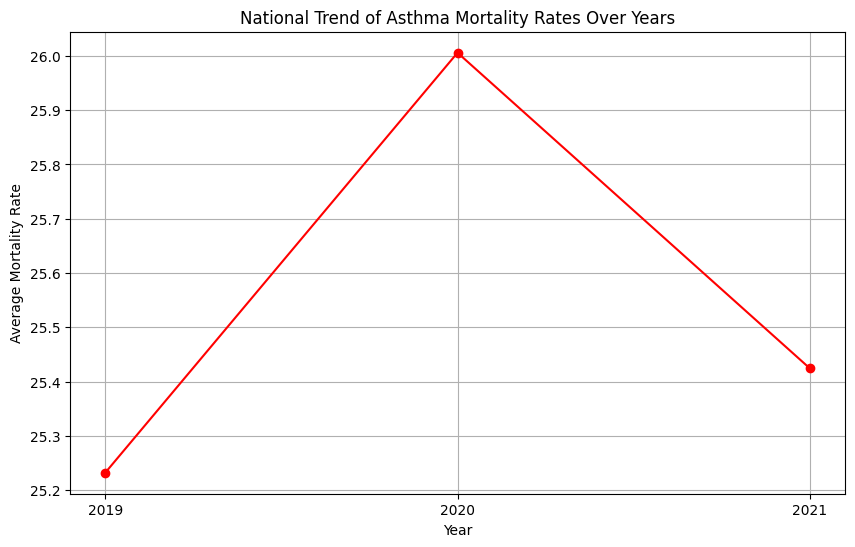

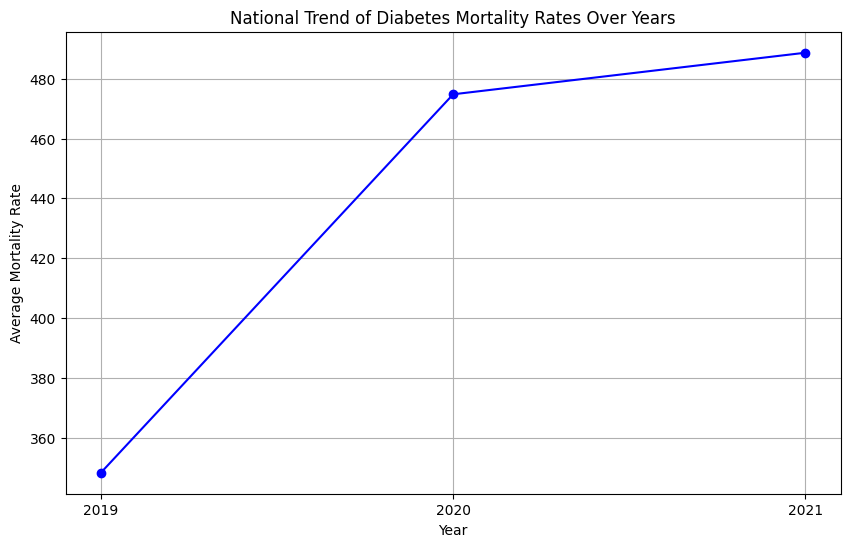

Year,2019,2020,2021
State,,,
Alabama,19.952778,19.680556,21.188889
Alaska,27.000000,27.000000,27.000000
Arizona,22.580556,24.619444,23.069444
Arkansas,24.194444,22.458333,24.347222
California,48.894444,56.597222,46.102778
Colorado,21.677778,21.661111,23.650000
Connecticut,21.527778,23.163889,25.772222
Delaware,27.000000,27.000000,27.000000
District of Columbia,27.000000,27.000000,27.000000


Year,2019,2020,2021
State,,,
Alabama,213.712500,298.495833,335.113889
Alaska,46.118056,67.680556,72.633333
Arizona,345.281944,504.169444,555.129167
Arkansas,214.475000,284.988889,299.466667
California,1897.420833,2611.287500,2759.597222
Colorado,290.169444,371.419444,409.144444
Connecticut,150.711111,201.538889,158.043056
Delaware,69.131944,108.122222,116.444444
District of Columbia,64.731944,106.694444,93.737500


In [7]:
# Analysis 1
#National Trend of Asthma & Diabetes Mortality Rates Over Years

# Importing required libraries
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Renaming column name 'YearStart' to 'Year' 
CDI_data.rename(columns={'YearStart': 'Year'}, inplace=True)

# Filtering data for asthma and diabetes mortality
asthma_mortality_data = CDI_data[(CDI_data['Topic'] == 'Asthma') & (CDI_data['Question'].str.contains('mortality', case=False))]
diabetes_mortality_data = CDI_data[(CDI_data['Topic'] == 'Diabetes') & (CDI_data['Question'].str.contains('mortality', case=False))]

# Aggregating national mortality rates by year for both conditions
national_asthma_mortality_rates = asthma_mortality_data.groupby('Year')['DataValue'].mean()
national_diabetes_mortality_rates = diabetes_mortality_data.groupby('Year')['DataValue'].mean()

# Converting 'Year' to integer for cleaner axis labels
national_asthma_mortality_rates.index = national_asthma_mortality_rates.index.astype(int)
national_diabetes_mortality_rates.index = national_diabetes_mortality_rates.index.astype(int)

# Plotting the national trend over the years for both conditions
# Asthma Mortality Rates Plot
plt.figure(figsize=(10, 6))
national_asthma_mortality_rates.plot(kind='line', marker='o', color='red')
plt.title('National Trend of Asthma Mortality Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.xticks(national_asthma_mortality_rates.index) 
plt.grid(True)
plt.show()

# Diabetes Mortality Rates Plot
plt.figure(figsize=(10, 6))
national_diabetes_mortality_rates.plot(kind='line', marker='o', color='blue')
plt.title('National Trend of Diabetes Mortality Rates Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mortality Rate')
plt.xticks(national_diabetes_mortality_rates.index)  
plt.grid(True)
plt.show()

# Grouping and calculating mean mortality rates by State and Year
asthma_mortality_statewise_summary = asthma_mortality_data.groupby(['State', 'Year'])['DataValue'].mean().unstack()
diabetes_mortality_statewise_summary = diabetes_mortality_data.groupby(['State', 'Year'])['DataValue'].mean().unstack()

# Defining a function to render DataFrame as HTML with borders and title
def render_mortality_table_with_borders(df, title):
    html = f"<h2>{title}</h2>"
    html += df.to_html(border=1)  
    return html

# Generating HTML for asthma and diabetes mortality rate summaries
asthma_html = render_mortality_table_with_borders(asthma_mortality_statewise_summary, "Asthma Mortality Rates Statewide Summary")
diabetes_html = render_mortality_table_with_borders(diabetes_mortality_statewise_summary, "Diabetes Mortality Rates Statewide Summary")

# Displaying the tables
display(HTML(asthma_html))
display(HTML(diabetes_html))

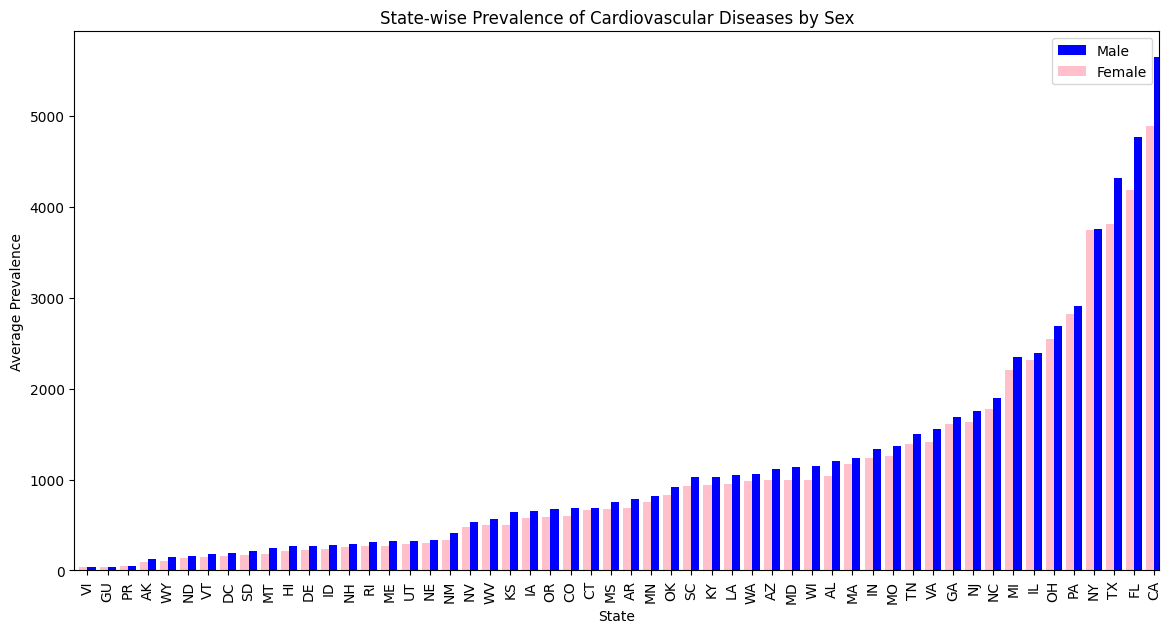

In [8]:
# Analysis 2
#2. State-wise CardiovascularDisease Prevalence Analysis 

# Importing the required libraries
import matplotlib.pyplot as plt

# Filtering data for cardiovascular diseases and focusing on male and female stratifications
cardio_male_data = CDI_data[(CDI_data['Topic'] == 'Cardiovascular Disease') & (CDI_data['Stratification1'] == 'Male')]
cardio_female_data = CDI_data[(CDI_data['Topic'] == 'Cardiovascular Disease') & (CDI_data['Stratification1'] == 'Female')]

# Calculating average prevalence by state for males
statewise_cardio_prevalence_male = cardio_male_data.groupby('LocationAbbr')['DataValue'].mean().sort_values()

# Calculating average prevalence by state for females
statewise_cardio_prevalence_female = cardio_female_data.groupby('LocationAbbr')['DataValue'].mean().sort_values()

# Plotting for comparison
plt.figure(figsize=(14, 7))
statewise_cardio_prevalence_male.plot(kind='bar', color='blue', position=0, label='Male', width=0.4)
statewise_cardio_prevalence_female.plot(kind='bar', color='pink', position=1, label='Female', width=0.4)
plt.title('State-wise Prevalence of Cardiovascular Diseases by Sex')
plt.xlabel('State')
plt.ylabel('Average Prevalence')
plt.legend()
plt.xticks(rotation=90)  
plt.show()

C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_11800\1170239450.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_disease_mortality_data['Latitude'], liver_disease_mortality_data['Longitude'] = zip(
C:\Users\Kushwanth\AppData\Local\Temp\ipykernel_11800\1170239450.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  liver_disease_mortality_data['Latitude'], liver_disease_mortality_data['Longitude'] = zip(


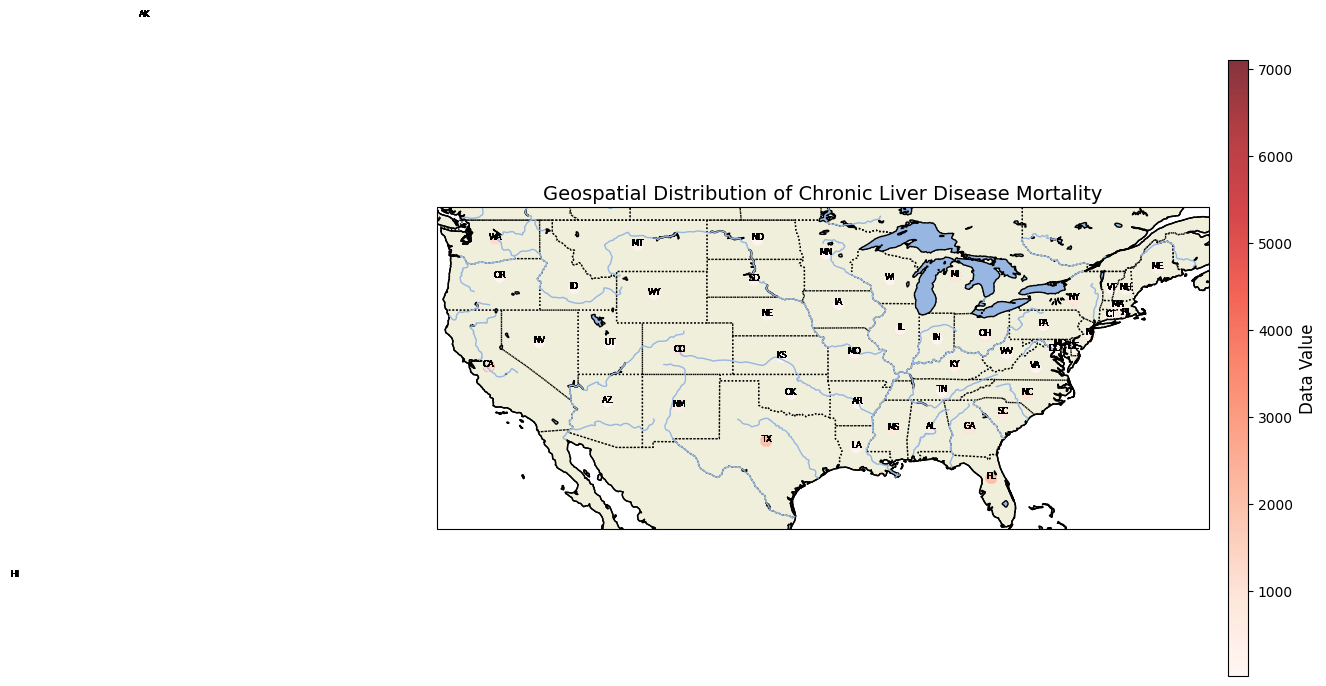

In [9]:
# Analysis 3
#Geospatial Distribution of Chronic Liver Disease Mortality

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Filtering the data for the specified conditions
liver_disease_mortality_data = CDI_data[
    (CDI_data['Topic'] == 'Alcohol') &
    (CDI_data['DataValueUnit'] == 'Number') &
    (CDI_data['Question'] == 'Chronic liver disease mortality among all people, underlying cause')
]

# Defining a funtion for Geolocation extraction process
def extract_lat_lon(geolocation):
    try:
        geolocation = geolocation.replace('POINT (', '').replace(')', '')
        lon, lat = geolocation.split()  
        return float(lat), float(lon)
    except:
        return None, None

# Applying the extraction function
liver_disease_mortality_data['Latitude'], liver_disease_mortality_data['Longitude'] = zip(
    *liver_disease_mortality_data['Geolocation'].apply(extract_lat_lon)
)

# Dropping rows where latitude or longitude could not be extracted
lliver_disease_mortality_data = liver_disease_mortality_data.dropna(subset=['Latitude', 'Longitude'])

# Initializing the map
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Geospatial Distribution of Chronic Liver Disease Mortality', fontsize=14)

# Setting extent to focus on the continental United States
ax.set_extent([-125, -65, 25, 50], crs=ccrs.PlateCarree())  

# Adding map features
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)

# Plotting the data points
scatter = ax.scatter(
    liver_disease_mortality_data['Longitude'], 
    liver_disease_mortality_data['Latitude'], 
    c=liver_disease_mortality_data['DataValue'], 
    cmap='Reds', 
    s=50, 
    alpha=0.8, 
    transform=ccrs.PlateCarree()
)

# Adding state abbreviations from the data
for _, row in liver_disease_mortality_data.iterrows():
    ax.text(
        row['Longitude'], 
        row['Latitude'], 
        row['LocationAbbr'],  
        fontsize=6, 
        color='black', 
        ha='center', 
        transform=ccrs.PlateCarree()
    )

# Adding a colorbar
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.02, aspect=30)
cbar.set_label('Data Value', fontsize=12)

# Displaying the plot
plt.show() 

In [11]:
#Interactive Dashboard

#Importing the necessary Libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Filtering data for "Binge drinking prevalence among adults" and "%"
binge_drinking_data = CDI_data[
    (CDI_data['Topic'] == 'Alcohol') &
    (CDI_data['Question'] == 'Binge drinking prevalence among adults') &
    (CDI_data['DataValueUnit'] == '%')
]

# Checking the structure of the filtered dataset
print(binge_drinking_data.columns)
print(binge_drinking_data.head())

# Creating Dash app
app = dash.Dash(__name__)

# Defining layout
app.layout = html.Div([
    html.H1("Binge Drinking Prevalence Among Adults", style={'text-align': 'center'}),

    # Creating a Dropdown to select state
    html.Label("Select a State:"),
    dcc.Dropdown(
        id='state-dropdown',
        options=[{'label': state, 'value': state} for state in binge_drinking_data['LocationAbbr'].unique()],
        value=binge_drinking_data['LocationAbbr'].unique()[0],  
        style={'width': '50%'}
    ),

    # Creating a Line chart for yearly trend
    dcc.Graph(id='prevalence-trend'),
])

# Defining callback to update graph based on selected state
@app.callback(
    Output('prevalence-trend', 'figure'),
    [Input('state-dropdown', 'value')]
)
def update_graph(selected_state):
    # Filtering data by the selected state
    state_data = binge_drinking_data[binge_drinking_data['LocationAbbr'] == selected_state]
    
    # Grouping by `Year` and calculating mean prevalence
    summary_by_year = state_data.groupby('Year')['DataValue'].mean()

    # Creating the figure
    figure = {
        'data': [
            go.Scatter(
                x=summary_by_year.index,
                y=summary_by_year.values,
                mode='lines+markers',
                name='Binge Drinking Prevalence',
                line={'color': 'blue'}
            )
        ],
        'layout': go.Layout(
            title=f'Yearly Trend of Binge Drinking Prevalence in {selected_state}',
            xaxis={
                'title': 'Year',
                'tickvals': list(summary_by_year.index), 
                'ticktext': [str(year) for year in summary_by_year.index]  
            },
            yaxis={'title': 'Prevalence Rate (%)'},
            hovermode='closest'
        )
    }

    return figure

# Running the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)  

Index(['Year', 'YearEnd', 'LocationAbbr', 'State', 'DataSource', 'Topic',
       'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DataValueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'Geolocation', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1'],
      dtype='object')
       Year  YearEnd LocationAbbr       State DataSource    Topic  \
26     2019     2019           NY    New York      BRFSS  Alcohol   
14330  2019     2019           AK      Alaska      BRFSS  Alcohol   
14446  2019     2019           CA  California      BRFSS  Alcohol   
14596  2019     2019           CA  California      BRFSS  Alcohol   
14750  2019     2019           AR    Arkansas      BRFSS  Alcohol   

                                     Question DataValueUnit  \
26     Binge drinking prevalence among adults        